# Speech Emotions Recognition

<center><img src="https://raw.githubusercontent.com/fafilia/speech-emotions-recognition/master/assets/Speech%20Emotion%20Recognition.png"><center>



## Introduction to Speech Emotions Recognition
### What does it mean?
<p style='text-align: justify;'> 
Language has a very broad scope. Besides being used as a communication medium, language can also be interpreted as a medium to convey the expression of emotions and feelings of humans to humans, humans to animals, or humans with their surroundings. Language processing itself has 2 approaches namely semantic and emotional approaches. In general, language is spoken so that humans understand what is being talked about by other humans, but above that there is an emotional approach that is more considered so that fellow parties can respond to emotions that are built up so that interaction occurs. So here we can say that emotions have an important role in everyday human (or other living) interactions. </p>

<p style='text-align: justify;'> 
Speech Recognition itself is not new in today's technological world. Previously, developed various technologies that combine natural language with computer machines. But the drawback is there is no emotion involved there. If we trace back, emotions are used as a response to the words given by the first party. On this basis the researchers developed a new thing that is now known as Speech Emotion Recognition (SER). SER is a technology that tries to extract sound signals from a speech made by a computer by involving and detecting the emotional activity contained in a speech. 
</p>

### Why do we need them?
<p style='text-align: justify;'>
In the psychological approach, emotions are one of the most difficult concepts to define. Then why is an emotion necessary and important to be defined? As discussed earlier that emotions have an important role in shaping an interaction between humans and humans or the surrounding environment.
When SER was first developed, its main objective was for the needs of human psychology research. Another goal is to develop AI as a breakthrough from previous Speech Recognition (SE without involving emotions). Nowadays, in addition to psychological research needs, SER can also be applied in the areas of entertainment, security, banking, call centers, etc.
</p>

## Core Concepts
### Audio
Audio is the sound produced by the vibration of an object. The sound produced by humans comes from the mechanism of action between organs such as the mouth, lungs, throat, vocal cords, and nose. The lungs press the air through the breath valve, then causes the vocal cords to vibrate, producing waves with pressure (impulses) through the air flow in the form of periodic quasi waves or what we call sound. Audio itself has 4 main attributes, namely:

### Time/Duration

Duration is the length of waves in units of time. In the dataset we use, the average length of duration for each sound data is 3 seconds (3s).

### Amplitude

Amplitude is the fluctuation in the change of sound waves. The shorter and the more frequent the waves, the higher the pitch or frequency.

### Sampling rate
Sampling rate is the number of audio samples per second, measured in Hz / KHz. Just as we work with images, we use pixels as a measure of image quality. The higher of pixel, means better the image produced. The highest sampling rate for an audio is 44100KHz. However, the most frequent and commonly used sampling rate is 22050 or 22KHz which is the upper limit of the sound that can be heard by humans.

### Frequency
Frequency is another approach when we want to see sound waves but we no longer see them based on the time domain. The frequency domain may not be visually intuitive but it will be very useful when we enter the sound extraction section. In addition, technically in fact the frequency domain actually requires far less computing space for storage.

Okay, if you are having trouble imagining it, let's make it more simple by looking at the illustration below.

<img src="https://www.gcsescience.com/transverse-wave.gif">


### Audio Extraction
#### MFCC
MFCC (Mel Frequency Cepstral Coefficents) was first recognized by Davis and Mermelstein in 1980. MFCC is one of the most famous methods for extracting features because its quite good ability to extract sound features. This method adapts the workings of human hearing. To get the MFCC coefficient we will divide the voice signal into several parts with the framing process. Then we will convert each part from the time domain to the frequency domain using Fourier Transform. From the results of the transform, we can calculate the energy at each frequency band using mel filterbank. This process will produce a mel spectrum.  Then mel spectrum will we inverse again to get the MFCC coefficient value in the time domain. Below is a chart of the sound feature extraction process using MFCC. I have also completed an explanation for each process from MFCC along with a mathematical formula that might look very heavy to process in the box (and maybe I won't give a very detailed explanation). But still, I will try to make it more concise by describing why each process needs to be done
<\br>
<center><img src="https://raw.githubusercontent.com/fafilia/speech-emotions-recognition/master/assets/MFCC.png" width=650><center>
    

##### Framing

The audio signal will continue to change all the time, so to simplify this we try to assume that in a short time scale the audio signal does not change much (the stationary sample continues to change on a short time scale). Therefore we broke the signal into several frames along the 20-40 ms. This framing process continues until all signals can be processed. In addition, this process is generally carried out by overlapping for each frame.

<img src="https://raw.githubusercontent.com/fafilia/speech-emotions-recognition/master/assets/framming.jpg">

Case Study : Frame the signal into 20-40 ms frames. 25ms is standard. This means the frame length for a 16kHz signal is 0.025x16000 = 400 samples. Frame step is usually something like 10ms (160 samples), which allows some overlap to the frames. The first 400 sample frame starts at sample 0, the next 400 sample frame starts at sample 160 etc. until the end of the speech file is reached.

##### Windowing
Windowing is done to minimize discontinuities that occur in the signal, which is caused by spectral leakage during the frame blocking process where new signals have different frequencies from the original signal. The concept of windowing is to taper the signal ends to zero at the beginning and end of each frame.

Window stated as $w(n), 0 ≤ n ≤ N −1$, where N is number of samples in each frame, $xi(n)$ is the input signal and the windowing result is $yi(n)$

$yi(n) = xi(n)w(n) , 0 ≤ n ≤ N − 1$

The type of window that is often used is Hamming window, which can be formulated by:

$w(n) = 0.54 - 0.46 cos(\frac{2\pi n}{N-1})$    , 0<=n<=N-1


<center>
<img src="https://raw.githubusercontent.com/fafilia/speech-emotions-recognition/master/assets/windowing.png"><center>

#### Fourier Transform 
<img src="https://raw.githubusercontent.com/fafilia/speech-emotions-recognition/master/assets/Fourier.PNG" width=700>

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. Depending on the location in the cochlea that vibrates (which wobbles small hairs), different nerves fire informing the brain that certain frequencies are present. Our periodogram estimate and  identifying which frequencies are present in the frame.

**Case Studies:**

The next steps are applied to every single frame, one set of 12 MFCC coefficients is extracted for each frame. A short aside on notation: we call our time domain signal $s(n)$. Once it is framed we have $si(n)$ where $n$ ranges over 1-400 (if our frames are 400 samples) and  ranges over the number of frames. When we calculate the complex DFT, we get $Si(k)$ where the  denotes the frame number corresponding to the time-domain frame. $Pi(k)$ is then the power spectrum of frame $i$.

$Si(k) = \sum_{n=1}^N si(n)h(n)e^{j2\pi kn/N}$ , $1<=k<=K$

where $h(n)$ is an N sample long window and K is the length of DFT. Periodogram-based power spectral estimate for the speech frame $si(n)$ is given by:

$Pi(k) = \frac{1}{N}\left\lvert{Si(k)}\right\rvert^{2}$

This is called the Periodogram estimate of the power spectrum. We take the absolute value of the complex fourier transform, and square the result. We would generally perform a 512 point FFT and keep only the first 257 coefficents.

DFT calculation directly in computerization can cause the process very long calculation. This happened
because of DFT required $N^{2}$ multiplication complex number. Because it, we need another approach for
calculate DFT quickly. That can performed using Fast Fourier Transform (FFT) where FFT eliminating the twin calculation process in DFT. The FFT algorithm only requires N log2 N complex multiplication.

#### Mel Frequency Wrapping
Mel Frequency Warping is generally done by using Filterbank. Filterbank is one form of filter that has the goal to find out the energy size of certain frequency bands in the sound signal. For purposes of MFCC, filters must be applied in the domain frequency. Once again, this method is adapted from the way the cochlea works. In the cochlea, there are separate parts that regulate the production of sounds based on certain frequencies. 

<img src="https://raw.githubusercontent.com/fafilia/speech-emotions-recognition/master/assets/koklea.jpg" width=400>

Human perception of frequency in the signal sound does not follow a linear scale. The frequency with which actually (in Hz) in a signal will be measured humans subjectively with use mel scale. To calculate mel scale we use:

$mel(f) = 1125 ln(1+\frac{f}{700})$ ,
where mel(f) is function of mel scale and f is frequency.

the most popular mel filter used is the triangular mel filter. 
<img src="https://haythamfayek.com/assets/posts/post1/mel_filters.jpg" width=500>

### Inverse Fourier Transform
The last step of feature extraction using MFCC is to return the log mel spectrum to the time domain. 

## Let's Start the Code

### Dependencies
<p style='text-align: justify;'>
Before you do a sound analysis, the first thing to do is installing the LibROSA package from python. LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. Later we will use this library to read audio data and extract sound features. As for modeling and training data for classification we will use Keras.

```
!pip install librosa
!pip install SoundFile
```


In [47]:
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
import soundfile
import os, glob, pickle
import numpy as np

import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# from pydrive.auth import GoogleAuth 
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# mfcc_res = "1me1TtLvVwv4yGJEw94tah0amuGFq1F6Q"
# downloaded = drive.CreateFile({'id':mfcc_res})
# downloaded.GetContentFile('mfcc_result.pkl')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

### The Dataset

Processing and classifying voice data is a challenging because it will be a bit heavy on the labeling part. This is because everyone has different perspectives on emotions. This time we will use the RAVDESS dataset (The Ryerson Audio-Visual Database of Emotional Speech and Song) which is a voice recording dataset of 24 actors (male and female). This voice recording voiced two statements in a neutral North American accent. Speech sounds include expressions of calm, happiness, sadness, anger, fear, surprise, and disgust. Each expression is produced at two levels of emotional intensity (normal, strong), with additional neutral expressions. RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440 data.

If you look at the name of each sound file, you will find a sequence of numbers that is a file recognition / identity code. The following is the identification of the file names in the RAVDESS dataset in accordance with the documentation on the [Zenodo] website (https://zenodo.org/record/1188976):

**Filename identifiers** 
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
- Vocal channel (01 = speech, 02 = song)
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door")
- Repetition (01 = 1st repetition, 02 = 2nd repetition)
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)

**Filename example: 03-01-08-02-02-02-14.wav**
- Audio-only (03)
- Speech (01)
- Surprised (08)
- String intensity (02)
- Statement "dogs" (02)
- 2nd Repetition (02)
- 14th Actor (14) Female, as the actor ID number is even.

In [11]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'Quarterly Content/RAV'

Mounted at /content/gdrive


In [4]:
RAV = "RAV/"
dir_list = os.listdir(RAV)
dir_list.sort()

In [5]:
# RAV = "/content/gdrive/My Drive/Quarterly Content/RAV/"

emotion = []
gender = []
path = []

for i in dir_list:
    speech_name = os.listdir(RAV + i)
    for speech in speech_name:
        part = speech.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + speech)
        
ravdess = pd.DataFrame(emotion)
ravdess = ravdess.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
ravdess = pd.concat([pd.DataFrame(gender),ravdess],axis=1)
ravdess.columns = ['gender','emotion']
ravdess['label'] = ravdess['gender'] + '_' + ravdess['emotion']
ravdess = pd.concat([ravdess,pd.DataFrame(path, columns = ['path'])],axis=1)
ravdess = ravdess.drop(['gender', 'emotion'], axis=1)
ravdess.head()

,label,path
0,male_neutral,RAV/Actor_01/03-01-01-01-01-01-01.wav
1,male_neutral,RAV/Actor_01/03-01-01-01-01-02-01.wav
2,male_neutral,RAV/Actor_01/03-01-01-01-02-01-01.wav
3,male_neutral,RAV/Actor_01/03-01-01-01-02-02-01.wav
4,male_neutral,RAV/Actor_01/03-01-02-01-01-01-01.wav


In [6]:
ravdess.label.value_counts()

male_neutral       144
female_neutral     144
female_disgust      96
male_fear           96
female_angry        96
male_angry          96
male_sad            96
male_happy          96
male_disgust        96
female_surprise     96
female_fear         96
female_sad          96
female_happy        96
male_surprise       96
Name: label, dtype: int64

Okay, we have got a label for each speech file. The following is an example of one of the speeches and emotions spoken by the actor who is complemented by the sound waves. We will see the pattern of surprised expressions.

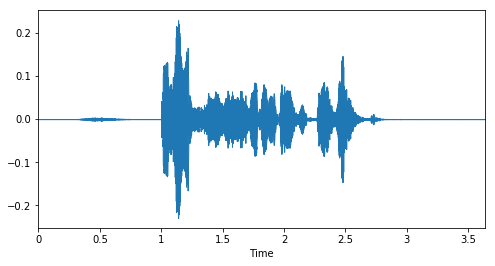

In [7]:
# Pick a fearful track
speech_name = RAV + 'Actor_24/03-01-08-02-02-02-24.wav'  
data, sampling_rate = librosa.load(speech_name)
plt.figure(figsize=(8, 4))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(speech_name)

In [8]:
from tqdm import tqdm
input_duration=3

In [11]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(ravdess))):
    X, sample_rate = librosa.load(ravdess.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=29), axis=0)
    feature = mfccs
    data.loc[i] = [feature]


100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [01:12<00:00, 19.97it/s]


In [12]:
data.to_pickle("mfcc29_result.pkl")

In [13]:
data = pd.read_pickle("mfcc_result.pkl")
data.head()

,feature
0,"[-65.80214, -65.80214, -65.80214, -65.80214, -..."
1,"[-62.625893, -63.899044, -64.441826, -59.98270..."
2,"[-65.82013, -65.82013, -65.82013, -65.82013, -..."
3,"[-66.05952, -66.05952, -66.05952, -66.05952, -..."
4,"[-70.26908, -70.26908, -70.26908, -70.26908, -..."


In [14]:
mfcc_result = pd.concat([ravdess,pd.DataFrame(data['feature'].values.tolist())],axis=1)
mfcc_result = mfcc_result.fillna(0)
mfcc_result.head()

,label,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,male_neutral,RAV/Actor_01/03-01-01-01-01-01-01.wav,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male_neutral,RAV/Actor_01/03-01-01-01-01-02-01.wav,-62.625893,-63.899044,-64.441826,-59.982704,-60.297188,-61.611843,-64.753067,-65.390709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male_neutral,RAV/Actor_01/03-01-01-01-02-01-01.wav,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_neutral,RAV/Actor_01/03-01-01-01-02-02-01.wav,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male_neutral,RAV/Actor_01/03-01-02-01-01-01-01.wav,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,...,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081


In [40]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_result.drop(['label','path'],axis=1)
                                                    , mfcc_result.label
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=50
                                                   )

# Lets see how the data present itself before normalisation 
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
394,-41.503311,-41.211246,-41.274643,-41.038738,-41.263790,-41.945488,-41.272335,-40.557945,-40.422543,-40.496639,...,-41.341007,-41.599228,-41.625507,-40.113579,-38.591576,-38.785294,-39.984200,-40.739601,-40.056179,-39.268093
1318,-50.587955,-50.762043,-51.001705,-50.692600,-50.526226,-49.585629,-49.305435,-48.890713,-47.974674,-47.900078,...,-51.106892,-51.106892,-51.106892,-51.106892,-51.106892,-51.106892,-51.106892,-51.106892,-51.106892,-51.106892
980,-50.996315,-50.717983,-52.588230,-50.147434,-49.994381,-50.783997,-50.865330,-49.923340,-49.938042,-52.728859,...,-52.918762,-50.584629,-50.524498,-53.542801,-53.175236,-55.845516,-55.519329,-52.899712,-53.038948,-54.524326
776,-61.185829,-61.185829,-58.011967,-57.166298,-58.832771,-58.601768,-59.729252,-57.335567,-57.512962,-59.813004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
262,-63.365860,-59.686436,-59.016769,-58.380070,-56.766930,-57.043045,-58.299965,-59.190620,-58.710876,-60.451260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [42]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [43]:
print(X_train.shape)
print(lb.classes_)

(1152, 259)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [44]:
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

In [45]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1152, 259, 1)

In [34]:
model = Sequential()
model.add(Conv1D(256, 5,padding='same', input_shape=(X_train.shape[1],1))) #1
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #2
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same')) #3
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same')) #4
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same')) #5
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same')) #6
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) #7
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

In [36]:
# model = Sequential()
# model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
# model.add(Activation('relu'))
# model.add(Conv1D(256, 8, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 8, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(64, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv1D(64, 8, padding='same'))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(14)) # Target class number
# model.add(Activation('softmax'))
# # opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# # opt = keras.optimizers.Adam(lr=0.0001)
# opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
# model.summary()

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=70, validation_data=(X_test, y_test))

Train on 1152 samples, validate on 288 samples
Epoch 1/70
1152/1152 [==============================] - ETA: 16s - loss: 2.6548 - accuracy: 0.125 - ETA: 9s - loss: 2.5260 - accuracy: 0.156 - ETA: 7s - loss: 3.9922 - accuracy: 0.12 - ETA: 6s - loss: 3.6681 - accuracy: 0.09 - ETA: 6s - loss: 3.4402 - accuracy: 0.07 - ETA: 5s - loss: 3.2978 - accuracy: 0.09 - ETA: 5s - loss: 3.1739 - accuracy: 0.11 - ETA: 5s - loss: 3.0918 - accuracy: 0.12 - ETA: 4s - loss: 3.0160 - accuracy: 0.13 - ETA: 4s - loss: 2.9654 - accuracy: 0.12 - ETA: 4s - loss: 2.9114 - accuracy: 0.14 - ETA: 4s - loss: 2.8597 - accuracy: 0.14 - ETA: 4s - loss: 2.8183 - accuracy: 0.14 - ETA: 4s - loss: 2.7986 - accuracy: 0.14 - ETA: 3s - loss: 2.7604 - accuracy: 0.15 - ETA: 3s - loss: 2.7333 - accuracy: 0.14 - ETA: 3s - loss: 2.6951 - accuracy: 0.16 - ETA: 3s - loss: 2.6736 - accuracy: 0.15 - ETA: 3s - loss: 2.6251 - accuracy: 0.17 - ETA: 3s - loss: 2.6025 - accuracy: 0.18 - ETA: 3s - loss: 2.5772 - accuracy: 0.19 - ETA: 3s - lo

1152/1152 [==============================] - ETA: 3s - loss: 1.7715 - accuracy: 0.31 - ETA: 3s - loss: 1.7165 - accuracy: 0.25 - ETA: 3s - loss: 1.7355 - accuracy: 0.29 - ETA: 3s - loss: 1.6926 - accuracy: 0.26 - ETA: 3s - loss: 1.7107 - accuracy: 0.28 - ETA: 3s - loss: 1.6482 - accuracy: 0.34 - ETA: 3s - loss: 1.6770 - accuracy: 0.34 - ETA: 3s - loss: 1.6479 - accuracy: 0.39 - ETA: 3s - loss: 1.6614 - accuracy: 0.38 - ETA: 3s - loss: 1.7099 - accuracy: 0.38 - ETA: 3s - loss: 1.6914 - accuracy: 0.39 - ETA: 3s - loss: 1.6804 - accuracy: 0.39 - ETA: 3s - loss: 1.6684 - accuracy: 0.38 - ETA: 3s - loss: 1.6598 - accuracy: 0.38 - ETA: 3s - loss: 1.6531 - accuracy: 0.39 - ETA: 3s - loss: 1.6485 - accuracy: 0.39 - ETA: 3s - loss: 1.6600 - accuracy: 0.39 - ETA: 2s - loss: 1.6481 - accuracy: 0.39 - ETA: 2s - loss: 1.6551 - accuracy: 0.38 - ETA: 2s - loss: 1.6385 - accuracy: 0.40 - ETA: 2s - loss: 1.6494 - accuracy: 0.39 - ETA: 2s - loss: 1.6354 - accuracy: 0.40 - ETA: 2s - loss: 1.6203 - accura

1152/1152 [==============================] - ETA: 4s - loss: 1.1215 - accuracy: 0.56 - ETA: 4s - loss: 1.2529 - accuracy: 0.53 - ETA: 4s - loss: 1.3199 - accuracy: 0.54 - ETA: 4s - loss: 1.3271 - accuracy: 0.53 - ETA: 3s - loss: 1.2537 - accuracy: 0.56 - ETA: 3s - loss: 1.3066 - accuracy: 0.56 - ETA: 3s - loss: 1.3407 - accuracy: 0.54 - ETA: 3s - loss: 1.3502 - accuracy: 0.52 - ETA: 3s - loss: 1.3374 - accuracy: 0.54 - ETA: 3s - loss: 1.3305 - accuracy: 0.55 - ETA: 3s - loss: 1.3233 - accuracy: 0.54 - ETA: 3s - loss: 1.2923 - accuracy: 0.54 - ETA: 3s - loss: 1.2924 - accuracy: 0.53 - ETA: 3s - loss: 1.3263 - accuracy: 0.52 - ETA: 3s - loss: 1.3002 - accuracy: 0.54 - ETA: 3s - loss: 1.3008 - accuracy: 0.53 - ETA: 2s - loss: 1.2851 - accuracy: 0.53 - ETA: 2s - loss: 1.2735 - accuracy: 0.54 - ETA: 2s - loss: 1.2893 - accuracy: 0.53 - ETA: 2s - loss: 1.2911 - accuracy: 0.53 - ETA: 2s - loss: 1.3201 - accuracy: 0.52 - ETA: 2s - loss: 1.3179 - accuracy: 0.52 - ETA: 2s - loss: 1.3231 - accura

1152/1152 [==============================] - ETA: 5s - loss: 1.0220 - accuracy: 0.62 - ETA: 5s - loss: 0.9655 - accuracy: 0.71 - ETA: 5s - loss: 1.0022 - accuracy: 0.72 - ETA: 4s - loss: 0.9362 - accuracy: 0.75 - ETA: 4s - loss: 0.8553 - accuracy: 0.76 - ETA: 4s - loss: 0.7976 - accuracy: 0.79 - ETA: 4s - loss: 0.7857 - accuracy: 0.78 - ETA: 4s - loss: 0.8259 - accuracy: 0.77 - ETA: 4s - loss: 0.8310 - accuracy: 0.77 - ETA: 4s - loss: 0.8614 - accuracy: 0.75 - ETA: 4s - loss: 0.8654 - accuracy: 0.75 - ETA: 4s - loss: 0.8670 - accuracy: 0.73 - ETA: 4s - loss: 0.8776 - accuracy: 0.73 - ETA: 4s - loss: 0.8636 - accuracy: 0.73 - ETA: 4s - loss: 0.9114 - accuracy: 0.72 - ETA: 4s - loss: 0.9027 - accuracy: 0.71 - ETA: 4s - loss: 0.9119 - accuracy: 0.70 - ETA: 3s - loss: 0.9165 - accuracy: 0.69 - ETA: 3s - loss: 0.9085 - accuracy: 0.70 - ETA: 3s - loss: 0.9191 - accuracy: 0.70 - ETA: 3s - loss: 0.9156 - accuracy: 0.69 - ETA: 3s - loss: 0.8994 - accuracy: 0.70 - ETA: 3s - loss: 0.9159 - accura

1152/1152 [==============================] - ETA: 5s - loss: 0.2441 - accuracy: 0.93 - ETA: 5s - loss: 0.4885 - accuracy: 0.87 - ETA: 5s - loss: 0.4572 - accuracy: 0.89 - ETA: 5s - loss: 0.4088 - accuracy: 0.90 - ETA: 5s - loss: 0.3878 - accuracy: 0.91 - ETA: 5s - loss: 0.3929 - accuracy: 0.91 - ETA: 5s - loss: 0.4474 - accuracy: 0.90 - ETA: 4s - loss: 0.4375 - accuracy: 0.90 - ETA: 4s - loss: 0.4311 - accuracy: 0.90 - ETA: 4s - loss: 0.4179 - accuracy: 0.90 - ETA: 4s - loss: 0.4050 - accuracy: 0.91 - ETA: 4s - loss: 0.3888 - accuracy: 0.92 - ETA: 4s - loss: 0.4161 - accuracy: 0.91 - ETA: 4s - loss: 0.4414 - accuracy: 0.90 - ETA: 4s - loss: 0.4733 - accuracy: 0.89 - ETA: 4s - loss: 0.4732 - accuracy: 0.88 - ETA: 4s - loss: 0.4691 - accuracy: 0.87 - ETA: 3s - loss: 0.4693 - accuracy: 0.87 - ETA: 3s - loss: 0.4664 - accuracy: 0.87 - ETA: 3s - loss: 0.4565 - accuracy: 0.87 - ETA: 3s - loss: 0.4665 - accuracy: 0.87 - ETA: 3s - loss: 0.5030 - accuracy: 0.85 - ETA: 3s - loss: 0.5009 - accura

1152/1152 [==============================] - ETA: 4s - loss: 0.5321 - accuracy: 0.93 - ETA: 4s - loss: 0.4783 - accuracy: 0.84 - ETA: 4s - loss: 0.3402 - accuracy: 0.89 - ETA: 4s - loss: 0.3122 - accuracy: 0.89 - ETA: 4s - loss: 0.2625 - accuracy: 0.91 - ETA: 4s - loss: 0.2263 - accuracy: 0.92 - ETA: 4s - loss: 0.2018 - accuracy: 0.93 - ETA: 4s - loss: 0.1864 - accuracy: 0.94 - ETA: 4s - loss: 0.1844 - accuracy: 0.95 - ETA: 4s - loss: 0.1724 - accuracy: 0.95 - ETA: 4s - loss: 0.1783 - accuracy: 0.95 - ETA: 4s - loss: 0.1863 - accuracy: 0.95 - ETA: 4s - loss: 0.1838 - accuracy: 0.95 - ETA: 4s - loss: 0.2003 - accuracy: 0.94 - ETA: 4s - loss: 0.1981 - accuracy: 0.94 - ETA: 4s - loss: 0.2155 - accuracy: 0.93 - ETA: 4s - loss: 0.2208 - accuracy: 0.93 - ETA: 4s - loss: 0.2216 - accuracy: 0.92 - ETA: 4s - loss: 0.2289 - accuracy: 0.92 - ETA: 4s - loss: 0.2391 - accuracy: 0.92 - ETA: 4s - loss: 0.2315 - accuracy: 0.92 - ETA: 4s - loss: 0.2269 - accuracy: 0.92 - ETA: 4s - loss: 0.2306 - accura

1152/1152 [==============================] - ETA: 4s - loss: 0.2407 - accuracy: 0.93 - ETA: 4s - loss: 0.1575 - accuracy: 0.96 - ETA: 4s - loss: 0.1213 - accuracy: 0.97 - ETA: 4s - loss: 0.1112 - accuracy: 0.98 - ETA: 4s - loss: 0.1149 - accuracy: 0.98 - ETA: 4s - loss: 0.0986 - accuracy: 0.98 - ETA: 4s - loss: 0.0943 - accuracy: 0.99 - ETA: 4s - loss: 0.0887 - accuracy: 0.99 - ETA: 4s - loss: 0.0841 - accuracy: 0.99 - ETA: 4s - loss: 0.0823 - accuracy: 0.99 - ETA: 4s - loss: 0.0761 - accuracy: 0.99 - ETA: 4s - loss: 0.0706 - accuracy: 0.99 - ETA: 4s - loss: 0.0658 - accuracy: 0.99 - ETA: 3s - loss: 0.0652 - accuracy: 0.99 - ETA: 3s - loss: 0.0808 - accuracy: 0.98 - ETA: 3s - loss: 0.0792 - accuracy: 0.98 - ETA: 3s - loss: 0.0859 - accuracy: 0.98 - ETA: 3s - loss: 0.0888 - accuracy: 0.97 - ETA: 3s - loss: 0.0943 - accuracy: 0.97 - ETA: 3s - loss: 0.0957 - accuracy: 0.97 - ETA: 3s - loss: 0.0936 - accuracy: 0.97 - ETA: 3s - loss: 0.1054 - accuracy: 0.97 - ETA: 3s - loss: 0.1105 - accura

1152/1152 [==============================] - ETA: 4s - loss: 0.0037 - accuracy: 1.00 - ETA: 4s - loss: 0.0428 - accuracy: 0.96 - ETA: 4s - loss: 0.0300 - accuracy: 0.97 - ETA: 4s - loss: 0.0279 - accuracy: 0.98 - ETA: 4s - loss: 0.0510 - accuracy: 0.97 - ETA: 4s - loss: 0.0587 - accuracy: 0.97 - ETA: 4s - loss: 0.0538 - accuracy: 0.98 - ETA: 4s - loss: 0.0582 - accuracy: 0.97 - ETA: 4s - loss: 0.0607 - accuracy: 0.97 - ETA: 4s - loss: 0.0553 - accuracy: 0.98 - ETA: 4s - loss: 0.0581 - accuracy: 0.97 - ETA: 4s - loss: 0.0539 - accuracy: 0.97 - ETA: 4s - loss: 0.0509 - accuracy: 0.98 - ETA: 4s - loss: 0.0476 - accuracy: 0.98 - ETA: 4s - loss: 0.0453 - accuracy: 0.98 - ETA: 3s - loss: 0.0431 - accuracy: 0.98 - ETA: 3s - loss: 0.0406 - accuracy: 0.98 - ETA: 3s - loss: 0.0405 - accuracy: 0.98 - ETA: 3s - loss: 0.0433 - accuracy: 0.98 - ETA: 3s - loss: 0.0514 - accuracy: 0.98 - ETA: 3s - loss: 0.0493 - accuracy: 0.98 - ETA: 3s - loss: 0.0568 - accuracy: 0.98 - ETA: 3s - loss: 0.0609 - accura

1152/1152 [==============================] - ETA: 4s - loss: 0.0017 - accuracy: 1.00 - ETA: 4s - loss: 0.0656 - accuracy: 0.96 - ETA: 4s - loss: 0.0439 - accuracy: 0.97 - ETA: 4s - loss: 0.1439 - accuracy: 0.95 - ETA: 4s - loss: 0.1257 - accuracy: 0.96 - ETA: 4s - loss: 0.1092 - accuracy: 0.96 - ETA: 4s - loss: 0.0961 - accuracy: 0.97 - ETA: 4s - loss: 0.0863 - accuracy: 0.97 - ETA: 4s - loss: 0.0776 - accuracy: 0.97 - ETA: 4s - loss: 0.0705 - accuracy: 0.98 - ETA: 4s - loss: 0.0689 - accuracy: 0.98 - ETA: 4s - loss: 0.0636 - accuracy: 0.98 - ETA: 4s - loss: 0.0614 - accuracy: 0.98 - ETA: 4s - loss: 0.0593 - accuracy: 0.98 - ETA: 3s - loss: 0.0576 - accuracy: 0.98 - ETA: 3s - loss: 0.0545 - accuracy: 0.98 - ETA: 3s - loss: 0.0550 - accuracy: 0.98 - ETA: 3s - loss: 0.0575 - accuracy: 0.98 - ETA: 3s - loss: 0.0564 - accuracy: 0.98 - ETA: 3s - loss: 0.0538 - accuracy: 0.98 - ETA: 3s - loss: 0.0569 - accuracy: 0.98 - ETA: 3s - loss: 0.0544 - accuracy: 0.98 - ETA: 3s - loss: 0.0530 - accura

1152/1152 [==============================] - ETA: 4s - loss: 1.1818e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.2110e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0047 - accuracy: 1.0000   - ETA: 4s - loss: 0.0037 - accuracy: 1.00 - ETA: 4s - loss: 0.0030 - accuracy: 1.00 - ETA: 4s - loss: 0.0027 - accuracy: 1.00 - ETA: 4s - loss: 0.0025 - accuracy: 1.00 - ETA: 4s - loss: 0.0024 - accuracy: 1.00 - ETA: 4s - loss: 0.0025 - accuracy: 1.00 - ETA: 4s - loss: 0.0027 - accuracy: 1.00 - ETA: 4s - loss: 0.0028 - accuracy: 1.00 - ETA: 4s - loss: 0.0026 - accuracy: 1.00 - ETA: 3s - loss: 0.0024 - accuracy: 1.00 - ETA: 3s - loss: 0.0023 - accuracy: 1.00 - ETA: 3s - loss: 0.0022 - accuracy: 1.00 - ETA: 3s - loss: 0.0021 - accuracy: 1.00 - ETA: 3s - loss: 0.0021 - accuracy: 1.00 - ETA: 3s - loss: 0.0022 - accuracy: 1.00 - ETA: 3s - loss: 0.0021 - accuracy: 1.00 - ETA: 3s - loss: 0.0021 - accuracy: 1.00 - ETA: 3s - loss: 0.0030 - accuracy: 1.00 - ETA: 3s - loss: 0.0029 - accuracy: 1.00 - ETA: 3s - loss: 0.0

1152/1152 [==============================] - ETA: 4s - loss: 0.0142 - accuracy: 1.00 - ETA: 4s - loss: 0.0083 - accuracy: 1.00 - ETA: 4s - loss: 0.0066 - accuracy: 1.00 - ETA: 4s - loss: 0.0063 - accuracy: 1.00 - ETA: 4s - loss: 0.0085 - accuracy: 1.00 - ETA: 4s - loss: 0.0549 - accuracy: 0.98 - ETA: 4s - loss: 0.0471 - accuracy: 0.99 - ETA: 4s - loss: 0.0414 - accuracy: 0.99 - ETA: 4s - loss: 0.0374 - accuracy: 0.99 - ETA: 4s - loss: 0.0340 - accuracy: 0.99 - ETA: 4s - loss: 0.0331 - accuracy: 0.99 - ETA: 4s - loss: 0.0320 - accuracy: 0.99 - ETA: 4s - loss: 0.0296 - accuracy: 0.99 - ETA: 4s - loss: 0.0278 - accuracy: 0.99 - ETA: 3s - loss: 0.0260 - accuracy: 0.99 - ETA: 3s - loss: 0.0244 - accuracy: 0.99 - ETA: 3s - loss: 0.0241 - accuracy: 0.99 - ETA: 3s - loss: 0.0231 - accuracy: 0.99 - ETA: 3s - loss: 0.0220 - accuracy: 0.99 - ETA: 3s - loss: 0.0213 - accuracy: 0.99 - ETA: 3s - loss: 0.0203 - accuracy: 0.99 - ETA: 3s - loss: 0.0194 - accuracy: 0.99 - ETA: 3s - loss: 0.0186 - accura

1152/1152 [==============================] - ETA: 5s - loss: 6.8950e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.2022e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.1210e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.7304e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.7166e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.4983e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.0970e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.1579e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.7624e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.7880e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.5060e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.9952e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.6272e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.1971e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.7805e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.4174e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.1415e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0017 - accuracy: 1.0000   - ETA: 4s - loss: 0.0166 - accuracy: 0.99 - ETA: 3s - loss: 0.0158 - accuracy: 0.99 - ETA: 3s - loss: 0.0152 - accuracy: 0.99 - E

1152/1152 [==============================] - ETA: 4s - loss: 0.0075 - accuracy: 1.00 - ETA: 4s - loss: 0.0042 - accuracy: 1.00 - ETA: 4s - loss: 0.0898 - accuracy: 0.97 - ETA: 4s - loss: 0.0735 - accuracy: 0.98 - ETA: 4s - loss: 0.0605 - accuracy: 0.98 - ETA: 4s - loss: 0.0505 - accuracy: 0.98 - ETA: 4s - loss: 0.0611 - accuracy: 0.98 - ETA: 4s - loss: 0.0576 - accuracy: 0.98 - ETA: 4s - loss: 0.0531 - accuracy: 0.98 - ETA: 4s - loss: 0.0478 - accuracy: 0.98 - ETA: 4s - loss: 0.0467 - accuracy: 0.98 - ETA: 4s - loss: 0.0547 - accuracy: 0.98 - ETA: 4s - loss: 0.0505 - accuracy: 0.98 - ETA: 4s - loss: 0.0469 - accuracy: 0.98 - ETA: 4s - loss: 0.0440 - accuracy: 0.98 - ETA: 4s - loss: 0.0419 - accuracy: 0.98 - ETA: 4s - loss: 0.0397 - accuracy: 0.98 - ETA: 4s - loss: 0.0375 - accuracy: 0.98 - ETA: 3s - loss: 0.0356 - accuracy: 0.99 - ETA: 3s - loss: 0.0339 - accuracy: 0.99 - ETA: 3s - loss: 0.0324 - accuracy: 0.99 - ETA: 3s - loss: 0.0309 - accuracy: 0.99 - ETA: 3s - loss: 0.0296 - accura

1152/1152 [==============================] - ETA: 5s - loss: 1.6533e-04 - accuracy: 1.00 - ETA: 5s - loss: 9.7086e-05 - accuracy: 1.00 - ETA: 5s - loss: 0.0021 - accuracy: 1.0000   - ETA: 5s - loss: 0.0030 - accuracy: 1.00 - ETA: 5s - loss: 0.0641 - accuracy: 0.98 - ETA: 5s - loss: 0.0544 - accuracy: 0.98 - ETA: 5s - loss: 0.0466 - accuracy: 0.99 - ETA: 5s - loss: 0.0408 - accuracy: 0.99 - ETA: 5s - loss: 0.0430 - accuracy: 0.98 - ETA: 5s - loss: 0.0388 - accuracy: 0.98 - ETA: 5s - loss: 0.0353 - accuracy: 0.98 - ETA: 5s - loss: 0.0324 - accuracy: 0.98 - ETA: 4s - loss: 0.0299 - accuracy: 0.99 - ETA: 4s - loss: 0.0279 - accuracy: 0.99 - ETA: 4s - loss: 0.0298 - accuracy: 0.98 - ETA: 4s - loss: 0.0285 - accuracy: 0.98 - ETA: 4s - loss: 0.0309 - accuracy: 0.98 - ETA: 4s - loss: 0.0336 - accuracy: 0.98 - ETA: 4s - loss: 0.0318 - accuracy: 0.98 - ETA: 4s - loss: 0.0303 - accuracy: 0.98 - ETA: 4s - loss: 0.0288 - accuracy: 0.98 - ETA: 4s - loss: 0.0275 - accuracy: 0.98 - ETA: 4s - loss: 0.0

1152/1152 [==============================] - ETA: 6s - loss: 0.0087 - accuracy: 1.00 - ETA: 6s - loss: 0.0043 - accuracy: 1.00 - ETA: 6s - loss: 0.0029 - accuracy: 1.00 - ETA: 6s - loss: 0.0022 - accuracy: 1.00 - ETA: 6s - loss: 0.0019 - accuracy: 1.00 - ETA: 5s - loss: 0.0016 - accuracy: 1.00 - ETA: 5s - loss: 0.0016 - accuracy: 1.00 - ETA: 5s - loss: 0.0014 - accuracy: 1.00 - ETA: 5s - loss: 0.0020 - accuracy: 1.00 - ETA: 5s - loss: 0.0019 - accuracy: 1.00 - ETA: 5s - loss: 0.0017 - accuracy: 1.00 - ETA: 4s - loss: 0.0016 - accuracy: 1.00 - ETA: 4s - loss: 0.0015 - accuracy: 1.00 - ETA: 4s - loss: 0.0014 - accuracy: 1.00 - ETA: 4s - loss: 0.0018 - accuracy: 1.00 - ETA: 4s - loss: 0.0017 - accuracy: 1.00 - ETA: 4s - loss: 0.0016 - accuracy: 1.00 - ETA: 4s - loss: 0.0015 - accuracy: 1.00 - ETA: 4s - loss: 0.0014 - accuracy: 1.00 - ETA: 4s - loss: 0.0014 - accuracy: 1.00 - ETA: 4s - loss: 0.0019 - accuracy: 1.00 - ETA: 4s - loss: 0.0020 - accuracy: 1.00 - ETA: 3s - loss: 0.0020 - accura

1152/1152 [==============================] - ETA: 5s - loss: 7.6741e-07 - accuracy: 1.00 - ETA: 5s - loss: 2.8528e-05 - accuracy: 1.00 - ETA: 5s - loss: 0.0563 - accuracy: 0.9792   - ETA: 5s - loss: 0.0423 - accuracy: 0.98 - ETA: 5s - loss: 0.0685 - accuracy: 0.97 - ETA: 5s - loss: 0.0572 - accuracy: 0.97 - ETA: 5s - loss: 0.0507 - accuracy: 0.98 - ETA: 5s - loss: 0.0444 - accuracy: 0.98 - ETA: 5s - loss: 0.0394 - accuracy: 0.98 - ETA: 5s - loss: 0.0355 - accuracy: 0.98 - ETA: 4s - loss: 0.0323 - accuracy: 0.98 - ETA: 4s - loss: 0.0297 - accuracy: 0.98 - ETA: 4s - loss: 0.0275 - accuracy: 0.99 - ETA: 4s - loss: 0.0255 - accuracy: 0.99 - ETA: 4s - loss: 0.0238 - accuracy: 0.99 - ETA: 4s - loss: 0.0223 - accuracy: 0.99 - ETA: 4s - loss: 0.0210 - accuracy: 0.99 - ETA: 4s - loss: 0.0202 - accuracy: 0.99 - ETA: 4s - loss: 0.0193 - accuracy: 0.99 - ETA: 4s - loss: 0.0187 - accuracy: 0.99 - ETA: 4s - loss: 0.0178 - accuracy: 0.99 - ETA: 4s - loss: 0.0191 - accuracy: 0.99 - ETA: 3s - loss: 0.0

1152/1152 [==============================] - ETA: 4s - loss: 1.2730e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.1512e-05 - accuracy: 1.00 - ETA: 4s - loss: 6.0553e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.8734e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0407 - accuracy: 0.9750   - ETA: 4s - loss: 0.0339 - accuracy: 0.97 - ETA: 4s - loss: 0.0291 - accuracy: 0.98 - ETA: 4s - loss: 0.0255 - accuracy: 0.98 - ETA: 4s - loss: 0.0230 - accuracy: 0.98 - ETA: 4s - loss: 0.0207 - accuracy: 0.98 - ETA: 3s - loss: 0.0188 - accuracy: 0.98 - ETA: 3s - loss: 0.0173 - accuracy: 0.98 - ETA: 3s - loss: 0.0159 - accuracy: 0.99 - ETA: 3s - loss: 0.0153 - accuracy: 0.99 - ETA: 3s - loss: 0.0231 - accuracy: 0.98 - ETA: 3s - loss: 0.0217 - accuracy: 0.98 - ETA: 3s - loss: 0.0204 - accuracy: 0.98 - ETA: 3s - loss: 0.0193 - accuracy: 0.98 - ETA: 3s - loss: 0.0182 - accuracy: 0.99 - ETA: 3s - loss: 0.0237 - accuracy: 0.98 - ETA: 3s - loss: 0.0226 - accuracy: 0.98 - ETA: 3s - loss: 0.0216 - accuracy: 0.98 - ETA: 3s - l

1152/1152 [==============================] - ETA: 4s - loss: 1.5773e-04 - accuracy: 1.00 - ETA: 4s - loss: 8.3997e-05 - accuracy: 1.00 - ETA: 4s - loss: 0.0301 - accuracy: 0.9792   - ETA: 4s - loss: 0.0226 - accuracy: 0.98 - ETA: 4s - loss: 0.0181 - accuracy: 0.98 - ETA: 4s - loss: 0.0169 - accuracy: 0.98 - ETA: 4s - loss: 0.0145 - accuracy: 0.99 - ETA: 4s - loss: 0.0128 - accuracy: 0.99 - ETA: 4s - loss: 0.0114 - accuracy: 0.99 - ETA: 4s - loss: 0.0108 - accuracy: 0.99 - ETA: 4s - loss: 0.0098 - accuracy: 0.99 - ETA: 4s - loss: 0.0091 - accuracy: 0.99 - ETA: 3s - loss: 0.0087 - accuracy: 0.99 - ETA: 3s - loss: 0.0082 - accuracy: 0.99 - ETA: 3s - loss: 0.0077 - accuracy: 0.99 - ETA: 3s - loss: 0.0072 - accuracy: 0.99 - ETA: 3s - loss: 0.0068 - accuracy: 0.99 - ETA: 3s - loss: 0.0064 - accuracy: 0.99 - ETA: 3s - loss: 0.0073 - accuracy: 0.99 - ETA: 3s - loss: 0.0070 - accuracy: 0.99 - ETA: 3s - loss: 0.0066 - accuracy: 0.99 - ETA: 3s - loss: 0.0064 - accuracy: 0.99 - ETA: 3s - loss: 0.0

1152/1152 [==============================] - ETA: 4s - loss: 5.2624e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.8289e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.9075e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.4567e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.9748e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.6478e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.1732e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0012 - accuracy: 1.0000   - ETA: 4s - loss: 0.0011 - accuracy: 1.00 - ETA: 4s - loss: 9.7797e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0057 - accuracy: 0.9943   - ETA: 4s - loss: 0.0052 - accuracy: 0.99 - ETA: 4s - loss: 0.0048 - accuracy: 0.99 - ETA: 3s - loss: 0.0045 - accuracy: 0.99 - ETA: 3s - loss: 0.0042 - accuracy: 0.99 - ETA: 3s - loss: 0.0042 - accuracy: 0.99 - ETA: 3s - loss: 0.0039 - accuracy: 0.99 - ETA: 3s - loss: 0.0037 - accuracy: 0.99 - ETA: 3s - loss: 0.0035 - accuracy: 0.99 - ETA: 3s - loss: 0.0033 - accuracy: 0.99 - ETA: 3s - loss: 0.0032 - accuracy: 0.99 - ETA: 3s - loss: 0.0030 - accuracy

1152/1152 [==============================] - ETA: 4s - loss: 7.7913e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.9326e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.6456e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.9848e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.5943e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.3362e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0125 - accuracy: 0.9911   - ETA: 4s - loss: 0.0109 - accuracy: 0.99 - ETA: 4s - loss: 0.0097 - accuracy: 0.99 - ETA: 4s - loss: 0.0122 - accuracy: 0.99 - ETA: 4s - loss: 0.0111 - accuracy: 0.99 - ETA: 4s - loss: 0.0102 - accuracy: 0.99 - ETA: 4s - loss: 0.0094 - accuracy: 0.99 - ETA: 4s - loss: 0.0419 - accuracy: 0.99 - ETA: 4s - loss: 0.0394 - accuracy: 0.99 - ETA: 4s - loss: 0.0371 - accuracy: 0.99 - ETA: 4s - loss: 0.0715 - accuracy: 0.98 - ETA: 4s - loss: 0.0675 - accuracy: 0.98 - ETA: 4s - loss: 0.0640 - accuracy: 0.99 - ETA: 3s - loss: 0.0661 - accuracy: 0.98 - ETA: 3s - loss: 0.0631 - accuracy: 0.98 - ETA: 3s - loss: 0.0610 - accuracy: 0.98 - ETA

1152/1152 [==============================] - ETA: 4s - loss: 0.0234 - accuracy: 1.00 - ETA: 4s - loss: 0.0118 - accuracy: 1.00 - ETA: 4s - loss: 0.0100 - accuracy: 1.00 - ETA: 4s - loss: 0.0075 - accuracy: 1.00 - ETA: 4s - loss: 0.0061 - accuracy: 1.00 - ETA: 4s - loss: 0.0051 - accuracy: 1.00 - ETA: 4s - loss: 0.0044 - accuracy: 1.00 - ETA: 4s - loss: 0.0039 - accuracy: 1.00 - ETA: 4s - loss: 0.0035 - accuracy: 1.00 - ETA: 4s - loss: 0.0031 - accuracy: 1.00 - ETA: 4s - loss: 0.0343 - accuracy: 0.99 - ETA: 4s - loss: 0.0315 - accuracy: 0.99 - ETA: 4s - loss: 0.0644 - accuracy: 0.99 - ETA: 4s - loss: 0.0598 - accuracy: 0.99 - ETA: 3s - loss: 0.0558 - accuracy: 0.99 - ETA: 3s - loss: 0.0523 - accuracy: 0.99 - ETA: 3s - loss: 0.0494 - accuracy: 0.99 - ETA: 3s - loss: 0.0467 - accuracy: 0.99 - ETA: 3s - loss: 0.0442 - accuracy: 0.99 - ETA: 3s - loss: 0.0424 - accuracy: 0.99 - ETA: 3s - loss: 0.0404 - accuracy: 0.99 - ETA: 3s - loss: 0.0386 - accuracy: 0.99 - ETA: 3s - loss: 0.0369 - accura

1152/1152 [==============================] - ETA: 4s - loss: 0.0012 - accuracy: 1.00 - ETA: 4s - loss: 6.8931e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.5208e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.1897e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.3830e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.8353e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.4327e-04 - accuracy: 1.00 - ETA: 4s - loss: 2.1488e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.9413e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.9654e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.5148e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.4129e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.0822e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.7995e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.7739e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.6101e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.6949e-04 - accuracy: 1.00 - ETA: 4s - loss: 3.5198e-04 - accuracy: 1.00 - ETA: 3s - loss: 3.3357e-04 - accuracy: 1.00 - ETA: 3s - loss: 3.1908e-04 - accuracy: 1.00 - ETA: 3s - loss: 3.0425e-04 - accuracy: 

1152/1152 [==============================] - ETA: 4s - loss: 0.0578 - accuracy: 0.93 - ETA: 4s - loss: 0.0289 - accuracy: 0.96 - ETA: 4s - loss: 0.0193 - accuracy: 0.97 - ETA: 4s - loss: 0.0145 - accuracy: 0.98 - ETA: 4s - loss: 0.0116 - accuracy: 0.98 - ETA: 4s - loss: 0.0096 - accuracy: 0.98 - ETA: 4s - loss: 0.0086 - accuracy: 0.99 - ETA: 4s - loss: 0.0075 - accuracy: 0.99 - ETA: 4s - loss: 0.0067 - accuracy: 0.99 - ETA: 4s - loss: 0.0060 - accuracy: 0.99 - ETA: 4s - loss: 0.0055 - accuracy: 0.99 - ETA: 4s - loss: 0.0050 - accuracy: 0.99 - ETA: 4s - loss: 0.0046 - accuracy: 0.99 - ETA: 4s - loss: 0.0043 - accuracy: 0.99 - ETA: 4s - loss: 0.0040 - accuracy: 0.99 - ETA: 3s - loss: 0.0038 - accuracy: 0.99 - ETA: 3s - loss: 0.0036 - accuracy: 0.99 - ETA: 3s - loss: 0.0034 - accuracy: 0.99 - ETA: 3s - loss: 0.0032 - accuracy: 0.99 - ETA: 3s - loss: 0.0030 - accuracy: 0.99 - ETA: 3s - loss: 0.0029 - accuracy: 0.99 - ETA: 3s - loss: 0.0028 - accuracy: 0.99 - ETA: 3s - loss: 0.0026 - accura

1152/1152 [==============================] - ETA: 4s - loss: 1.3211e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.9100e-04 - accuracy: 1.00 - ETA: 4s - loss: 1.4393e-04 - accuracy: 1.00 - ETA: 4s - loss: 8.0948e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.5805e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.4861e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.7909e-04 - accuracy: 1.00 - ETA: 4s - loss: 8.5679e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.7815e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.0064e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.3731e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.9847e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.4788e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.1636e-04 - accuracy: 1.00 - ETA: 3s - loss: 5.7527e-04 - accuracy: 1.00 - ETA: 3s - loss: 5.3932e-04 - accuracy: 1.00 - ETA: 3s - loss: 5.1405e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.4058e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0439e-04 - accuracy: 1.00 - ETA: 3s - loss: 6.6917e-04 - accuracy: 1.00 - ETA: 3s - loss: 6.3740e-04 - accura

1152/1152 [==============================] - ETA: 6s - loss: 2.2352e-08 - accuracy: 1.00 - ETA: 6s - loss: 6.1201e-06 - accuracy: 1.00 - ETA: 6s - loss: 4.2713e-06 - accuracy: 1.00 - ETA: 6s - loss: 0.0020 - accuracy: 1.0000   - ETA: 6s - loss: 0.0016 - accuracy: 1.00 - ETA: 6s - loss: 0.0014 - accuracy: 1.00 - ETA: 5s - loss: 0.0012 - accuracy: 1.00 - ETA: 5s - loss: 0.0011 - accuracy: 1.00 - ETA: 5s - loss: 9.3721e-04 - accuracy: 1.00 - ETA: 5s - loss: 8.4369e-04 - accuracy: 1.00 - ETA: 5s - loss: 8.3812e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.7059e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.1133e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.6053e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0014 - accuracy: 1.0000   - ETA: 4s - loss: 0.0014 - accuracy: 1.00 - ETA: 4s - loss: 0.0013 - accuracy: 1.00 - ETA: 4s - loss: 0.0013 - accuracy: 1.00 - ETA: 4s - loss: 0.0012 - accuracy: 1.00 - ETA: 4s - loss: 0.0011 - accuracy: 1.00 - ETA: 4s - loss: 0.0011 - accuracy: 1.00 - ETA: 4s - loss: 0.0010 - accu

1152/1152 [==============================] - ETA: 5s - loss: 0.1626 - accuracy: 0.93 - ETA: 5s - loss: 0.0813 - accuracy: 0.96 - ETA: 5s - loss: 0.0542 - accuracy: 0.97 - ETA: 4s - loss: 0.0406 - accuracy: 0.98 - ETA: 4s - loss: 0.0327 - accuracy: 0.98 - ETA: 4s - loss: 0.0272 - accuracy: 0.98 - ETA: 4s - loss: 0.0234 - accuracy: 0.99 - ETA: 4s - loss: 0.0204 - accuracy: 0.99 - ETA: 4s - loss: 0.0182 - accuracy: 0.99 - ETA: 4s - loss: 0.0166 - accuracy: 0.99 - ETA: 4s - loss: 0.0151 - accuracy: 0.99 - ETA: 4s - loss: 0.0140 - accuracy: 0.99 - ETA: 4s - loss: 0.0129 - accuracy: 0.99 - ETA: 4s - loss: 0.0121 - accuracy: 0.99 - ETA: 4s - loss: 0.0186 - accuracy: 0.99 - ETA: 4s - loss: 0.0175 - accuracy: 0.99 - ETA: 4s - loss: 0.0165 - accuracy: 0.99 - ETA: 4s - loss: 0.0155 - accuracy: 0.99 - ETA: 4s - loss: 0.0147 - accuracy: 0.99 - ETA: 4s - loss: 0.0140 - accuracy: 0.99 - ETA: 4s - loss: 0.0195 - accuracy: 0.98 - ETA: 4s - loss: 0.0186 - accuracy: 0.98 - ETA: 3s - loss: 0.0178 - accura

1152/1152 [==============================] - ETA: 5s - loss: 1.6689e-06 - accuracy: 1.00 - ETA: 5s - loss: 8.8661e-07 - accuracy: 1.00 - ETA: 5s - loss: 6.3578e-07 - accuracy: 1.00 - ETA: 4s - loss: 4.7683e-07 - accuracy: 1.00 - ETA: 4s - loss: 3.8147e-07 - accuracy: 1.00 - ETA: 4s - loss: 3.1789e-07 - accuracy: 1.00 - ETA: 4s - loss: 2.7248e-07 - accuracy: 1.00 - ETA: 4s - loss: 2.3842e-07 - accuracy: 1.00 - ETA: 4s - loss: 2.1193e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.9073e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.7339e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.6577e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.5359e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.4422e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.3461e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.2945e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.3674e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.2914e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.2509e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.1884e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.1353e-07 - accura

1152/1152 [==============================] - ETA: 5s - loss: 6.3330e-07 - accuracy: 1.00 - ETA: 6s - loss: 5.3644e-07 - accuracy: 1.00 - ETA: 6s - loss: 6.6815e-05 - accuracy: 1.00 - ETA: 5s - loss: 6.7487e-05 - accuracy: 1.00 - ETA: 5s - loss: 6.0545e-05 - accuracy: 1.00 - ETA: 5s - loss: 5.0454e-05 - accuracy: 1.00 - ETA: 5s - loss: 4.5303e-05 - accuracy: 1.00 - ETA: 5s - loss: 3.9643e-05 - accuracy: 1.00 - ETA: 5s - loss: 3.5238e-05 - accuracy: 1.00 - ETA: 5s - loss: 0.0018 - accuracy: 1.0000   - ETA: 5s - loss: 0.0017 - accuracy: 1.00 - ETA: 4s - loss: 0.0015 - accuracy: 1.00 - ETA: 4s - loss: 0.0026 - accuracy: 1.00 - ETA: 4s - loss: 0.0024 - accuracy: 1.00 - ETA: 4s - loss: 0.0023 - accuracy: 1.00 - ETA: 4s - loss: 0.0021 - accuracy: 1.00 - ETA: 4s - loss: 0.0020 - accuracy: 1.00 - ETA: 4s - loss: 0.0019 - accuracy: 1.00 - ETA: 4s - loss: 0.0018 - accuracy: 1.00 - ETA: 4s - loss: 0.0018 - accuracy: 1.00 - ETA: 4s - loss: 0.0018 - accuracy: 1.00 - ETA: 3s - loss: 0.0017 - accuracy

1152/1152 [==============================] - ETA: 5s - loss: 0.6536 - accuracy: 0.93 - ETA: 5s - loss: 0.3268 - accuracy: 0.96 - ETA: 5s - loss: 0.2179 - accuracy: 0.97 - ETA: 5s - loss: 0.1634 - accuracy: 0.98 - ETA: 5s - loss: 0.1308 - accuracy: 0.98 - ETA: 5s - loss: 0.1090 - accuracy: 0.98 - ETA: 5s - loss: 0.0947 - accuracy: 0.99 - ETA: 5s - loss: 0.0828 - accuracy: 0.99 - ETA: 5s - loss: 0.0736 - accuracy: 0.99 - ETA: 5s - loss: 0.0663 - accuracy: 0.99 - ETA: 4s - loss: 0.0603 - accuracy: 0.99 - ETA: 4s - loss: 0.0552 - accuracy: 0.99 - ETA: 4s - loss: 0.0844 - accuracy: 0.99 - ETA: 4s - loss: 0.0813 - accuracy: 0.99 - ETA: 4s - loss: 0.0927 - accuracy: 0.98 - ETA: 4s - loss: 0.0869 - accuracy: 0.98 - ETA: 4s - loss: 0.1283 - accuracy: 0.98 - ETA: 4s - loss: 0.1212 - accuracy: 0.98 - ETA: 4s - loss: 0.1148 - accuracy: 0.98 - ETA: 4s - loss: 0.1091 - accuracy: 0.98 - ETA: 4s - loss: 0.1039 - accuracy: 0.98 - ETA: 3s - loss: 0.0992 - accuracy: 0.98 - ETA: 3s - loss: 0.0949 - accura

1152/1152 [==============================] - ETA: 5s - loss: 0.0595 - accuracy: 0.93 - ETA: 4s - loss: 0.0297 - accuracy: 0.96 - ETA: 4s - loss: 0.0198 - accuracy: 0.97 - ETA: 4s - loss: 0.0149 - accuracy: 0.98 - ETA: 4s - loss: 0.0119 - accuracy: 0.98 - ETA: 4s - loss: 0.0099 - accuracy: 0.98 - ETA: 4s - loss: 0.0085 - accuracy: 0.99 - ETA: 4s - loss: 0.0075 - accuracy: 0.99 - ETA: 4s - loss: 0.0066 - accuracy: 0.99 - ETA: 4s - loss: 0.0060 - accuracy: 0.99 - ETA: 4s - loss: 0.0054 - accuracy: 0.99 - ETA: 4s - loss: 0.0050 - accuracy: 0.99 - ETA: 4s - loss: 0.0046 - accuracy: 0.99 - ETA: 4s - loss: 0.0043 - accuracy: 0.99 - ETA: 4s - loss: 0.0040 - accuracy: 0.99 - ETA: 3s - loss: 0.0037 - accuracy: 0.99 - ETA: 3s - loss: 0.0037 - accuracy: 0.99 - ETA: 3s - loss: 0.0035 - accuracy: 0.99 - ETA: 3s - loss: 0.0033 - accuracy: 0.99 - ETA: 3s - loss: 0.0031 - accuracy: 0.99 - ETA: 3s - loss: 0.0030 - accuracy: 0.99 - ETA: 3s - loss: 0.0028 - accuracy: 0.99 - ETA: 3s - loss: 0.0027 - accura

1152/1152 [==============================] - ETA: 4s - loss: 1.4901e-07 - accuracy: 1.00 - ETA: 4s - loss: 2.4325e-06 - accuracy: 1.00 - ETA: 4s - loss: 1.7980e-06 - accuracy: 1.00 - ETA: 4s - loss: 1.4137e-06 - accuracy: 1.00 - ETA: 4s - loss: 1.3992e-06 - accuracy: 1.00 - ETA: 4s - loss: 2.0130e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.7546e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.5501e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.4003e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.3650e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.2416e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.1389e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.0615e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.0786e-05 - accuracy: 1.00 - ETA: 4s - loss: 1.0068e-05 - accuracy: 1.00 - ETA: 4s - loss: 9.5637e-06 - accuracy: 1.00 - ETA: 4s - loss: 9.0055e-06 - accuracy: 1.00 - ETA: 3s - loss: 8.5052e-06 - accuracy: 1.00 - ETA: 3s - loss: 9.7614e-06 - accuracy: 1.00 - ETA: 3s - loss: 9.2733e-06 - accuracy: 1.00 - ETA: 3s - loss: 9.7675e-06 - accura

1152/1152 [==============================] - ETA: 5s - loss: 3.2037e-07 - accuracy: 1.00 - ETA: 5s - loss: 1.6391e-07 - accuracy: 1.00 - ETA: 4s - loss: 0.0018 - accuracy: 1.0000   - ETA: 4s - loss: 0.0013 - accuracy: 1.00 - ETA: 5s - loss: 0.0011 - accuracy: 1.00 - ETA: 5s - loss: 8.7788e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.5253e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.5873e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.8742e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.2868e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.8062e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.3435e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.8577e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.4393e-04 - accuracy: 1.00 - ETA: 4s - loss: 5.1526e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.8306e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.5464e-04 - accuracy: 1.00 - ETA: 4s - loss: 4.2938e-04 - accuracy: 1.00 - ETA: 3s - loss: 4.0682e-04 - accuracy: 1.00 - ETA: 3s - loss: 3.8648e-04 - accuracy: 1.00 - ETA: 3s - loss: 3.6809e-04 - accuracy: 1.00

1152/1152 [==============================] - ETA: 6s - loss: 3.1809e-04 - accuracy: 1.00 - ETA: 6s - loss: 1.6216e-04 - accuracy: 1.00 - ETA: 5s - loss: 1.0820e-04 - accuracy: 1.00 - ETA: 5s - loss: 8.1153e-05 - accuracy: 1.00 - ETA: 5s - loss: 6.5036e-05 - accuracy: 1.00 - ETA: 5s - loss: 5.4227e-05 - accuracy: 1.00 - ETA: 5s - loss: 6.0452e-05 - accuracy: 1.00 - ETA: 5s - loss: 5.2895e-05 - accuracy: 1.00 - ETA: 5s - loss: 5.0269e-05 - accuracy: 1.00 - ETA: 5s - loss: 0.0016 - accuracy: 1.0000   - ETA: 5s - loss: 0.0014 - accuracy: 1.00 - ETA: 5s - loss: 0.0013 - accuracy: 1.00 - ETA: 4s - loss: 0.0012 - accuracy: 1.00 - ETA: 4s - loss: 0.0011 - accuracy: 1.00 - ETA: 4s - loss: 0.0011 - accuracy: 1.00 - ETA: 4s - loss: 9.8929e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.3716e-04 - accuracy: 1.00 - ETA: 4s - loss: 8.8510e-04 - accuracy: 1.00 - ETA: 4s - loss: 8.3851e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.9661e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.6690e-04 - accuracy: 1.00 - ETA: 4s -

1152/1152 [==============================] - ETA: 5s - loss: 2.6161e-05 - accuracy: 1.00 - ETA: 5s - loss: 7.3891e-05 - accuracy: 1.00 - ETA: 5s - loss: 7.0542e-05 - accuracy: 1.00 - ETA: 5s - loss: 6.0011e-05 - accuracy: 1.00 - ETA: 5s - loss: 6.6541e-05 - accuracy: 1.00 - ETA: 5s - loss: 5.5532e-05 - accuracy: 1.00 - ETA: 4s - loss: 4.7612e-05 - accuracy: 1.00 - ETA: 4s - loss: 0.0182 - accuracy: 0.9922   - ETA: 4s - loss: 0.0162 - accuracy: 0.99 - ETA: 4s - loss: 0.0146 - accuracy: 0.99 - ETA: 4s - loss: 0.0133 - accuracy: 0.99 - ETA: 4s - loss: 0.0121 - accuracy: 0.99 - ETA: 4s - loss: 0.0112 - accuracy: 0.99 - ETA: 4s - loss: 0.0104 - accuracy: 0.99 - ETA: 4s - loss: 0.0102 - accuracy: 0.99 - ETA: 4s - loss: 0.0096 - accuracy: 0.99 - ETA: 4s - loss: 0.0091 - accuracy: 0.99 - ETA: 4s - loss: 0.0086 - accuracy: 0.99 - ETA: 3s - loss: 0.0081 - accuracy: 0.99 - ETA: 3s - loss: 0.0077 - accuracy: 0.99 - ETA: 3s - loss: 0.0073 - accuracy: 0.99 - ETA: 3s - loss: 0.0070 - accuracy: 0.99 -

1152/1152 [==============================] - ETA: 5s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 5s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 5s - loss: 8.6923e-08 - accuracy: 1.00 - ETA: 5s - loss: 6.5192e-08 - accuracy: 1.00 - ETA: 5s - loss: 9.3877e-08 - accuracy: 1.00 - ETA: 5s - loss: 7.8231e-08 - accuracy: 1.00 - ETA: 4s - loss: 1.1176e-07 - accuracy: 1.00 - ETA: 4s - loss: 9.8720e-08 - accuracy: 1.00 - ETA: 4s - loss: 1.0100e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.0505e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.6662e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.7571e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.6850e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.5646e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.4752e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.4016e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.5033e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.8502e-07 - accuracy: 1.00 - ETA: 4s - loss: 1.7724e-07 - accuracy: 1.00 - ETA: 3s - loss: 1.6838e-07 - accuracy: 1.00 - ETA: 3s - loss: 1.8449e-07 - accura

In [38]:
model.save('model1_70ep')

In [62]:
from tensorflow import keras
model = keras.models.load_model('model1_70ep')

In [63]:
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 38.19%


In [52]:
# model = Sequential()
# model.add(Conv2D(64, (4,10), padding='same',input_shape=(X_train.shape[1],1)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))
    
# model.add(Conv2D(64, (4,10), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))
    
# model.add(Conv2D(32, (4,10), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))
    
# model.add(Conv2D(32, (4,10), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))

# model.add(Flatten()) 
# model.add(Dense(64))
# model.add(Dropout(rate=0.2))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=0.2))

# model.add(Dense(14)) # Target class number
# model.add(Activation('softmax'))

# opt = keras.optimizers.Adam(lr=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
# model_history=model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

In [64]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)

288/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 1ms/sample


In [67]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)


In [68]:
finaldf.head()

,actualvalues,predictedvalues
0,male_neutral,male_neutral
1,female_disgust,female_fear
2,female_disgust,male_sad
3,male_angry,male_surprise
4,male_surprise,male_surprise


In [69]:
finaldf['actualvalues'].value_counts()

male_neutral       36
female_neutral     26
female_disgust     24
male_sad           22
female_surprise    21
male_fear          21
male_disgust       20
female_angry       19
male_angry         18
male_happy         18
female_happy       18
male_surprise      18
female_fear        14
female_sad         13
Name: actualvalues, dtype: int64

In [70]:
confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)

array([[ 6,  1,  1,  4,  0,  1,  3,  0,  0,  1,  1,  0,  1,  0],
       [ 1,  4,  3,  0, 10,  4,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 1,  1,  5,  2,  2,  0,  1,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  1,  1,  3,  2,  2,  8,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0, 19,  3,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  4,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  1,  3,  1,  1, 12,  0,  1,  0,  0,  0,  1,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  9,  1,  1,  2,  0,  1,  2],
       [ 1,  0,  1,  0,  0,  0,  0,  1,  9,  1,  2,  1,  3,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  3,  7,  2,  3,  2,  2],
       [ 2,  0,  0,  0,  0,  0,  0,  4,  2,  0,  2,  4,  4,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  5,  0,  5, 15,  7,  2],
       [ 1,  0,  0,  0,  1,  0,  3,  0,  2,  1,  1,  2,  8,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  2,  2,  3,  1,  2,  0,  7]],
      dtype=int64)

In [71]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.40      0.32      0.35        19
 female_disgust       0.40      0.17      0.24        24
    female_fear       0.42      0.36      0.38        14
   female_happy       0.25      0.17      0.20        18
 female_neutral       0.46      0.73      0.57        26
     female_sad       0.27      0.31      0.29        13
female_surprise       0.38      0.57      0.45        21
     male_angry       0.50      0.50      0.50        18
   male_disgust       0.36      0.45      0.40        20
      male_fear       0.44      0.33      0.38        21
     male_happy       0.12      0.11      0.11        18
   male_neutral       0.56      0.42      0.48        36
       male_sad       0.27      0.36      0.31        22
  male_surprise       0.39      0.39      0.39        18

      micro avg       0.38      0.38      0.38       288
      macro avg       0.37      0.37      0.36       288
   weighted avg       0.39   

## Conclusions
Building a machine learning model for sound processing is arguably not easy. The feature extraction process really determines how well the model is created. Choosing the wrong features can cause our model to be less precise in predicting emotional classes. Using the 1D Convolutional model might not be a good approach to this data, we can try to implement Conv2D to get better accuracy. In addition, we can also use other feature extractions such as mel spectogram or chroma that might make our models better at predicting emotions.

### Pros
- SER will be very useful if it can be implemented for business areas such as Call Centers where we know that we have limitations to interact directly with them. But with SER we can get their emotions so we know how to respond and interact with them.

### Cons
- Emotions in speech can be interpreted differently by each human being because there is an element of subjectivity there.
- Each utterance contains a composition of words and sentences that are very much, it could be in a single utterance contains several sentences that have different emotions. This then becomes a challenge how much emotion can be detected in it.

## References
- [Practical Cryptoghrapy](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/#eqn1)
- [The Dummy Guide to MFCC](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)
- 

# Learn by Buildings
Hello friends, thank you for taking part in the internal training session that I organized. I hope you enjoy it. To hone and deepen your knowledge about the material that I have presented, you can try to do LBB below.There are 2 research datasets commonly used for speech emotion recognition.

1. [Crowd-sourced Emotional Mutimodal Actors Dataset(CREMA-D)](https://github.com/CheyneyComputerScience/CREMA-D)
2. [Toronto Emotional Speech Set Data(TESS)](https://tspace.library.utoronto.ca/handle/1807/24487)
3. If you feel challenged, the CNN model we have created previously has an overfit where this condition is not good enough. Try to improve the model so that it produces good accuracy and does not overfit or underfit.

Based on what we have learned previously (how we read data, extract sound features, create classification models) please choose one of the datasets above and try to do speech emotion recognition by building a machine learning model that is good enough to predict each emotion. You can use whatever machine learning algorithm you know to do this task. Feel free to ask me if you are having a hard time working on it. Thank you and see you at the other internal training which was more exciting than we have done :)